In [1]:
import os
import pathlib
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

root_dir = pathlib.Path("output/decompose/bouncing_car_v2")
data_name = root_dir.stem
dynamic_dir = root_dir / 'dynamic'
static_dir = root_dir / 'static'

data_dir = root_dir / data_name
data_dir.mkdir(exist_ok=True)

flow_dir = data_dir / 'flow'
flow_dir.mkdir(exist_ok=True)

rgb_dir = data_dir / 'rgb-raw'
rgb_dir.mkdir(exist_ok=True)

depth_dir = data_dir / 'depth'
depth_dir.mkdir(exist_ok=True)

mask_dir = data_dir / 'mask-raw'
mask_dir.mkdir(exist_ok=True)



In [2]:
# copy flows
for img in dynamic_dir.glob('*flow*.png'):
    shutil.copy(img, flow_dir / img.name)

# copy rgb
for img in dynamic_dir.glob('rgba*.png'):
    shutil.copy(img, rgb_dir / img.name)

# copy depth
for img in dynamic_dir.glob('depth*.tiff'):
    shutil.copy(img, depth_dir / img.name)

shutil.copy(dynamic_dir / 'metadata.json', data_dir / 'metadata_kubric.json')
shutil.copy(dynamic_dir / 'events.json', data_dir / 'events.json')
shutil.copy(dynamic_dir / 'data_ranges.json', data_dir / 'data_ranges.json')
shutil.copy(dynamic_dir / 'args.config', data_dir / 'args.config')
shutil.copy(dynamic_dir / 'scene.blend', data_dir / 'scene.blend')
shutil.copy(dynamic_dir / 'scene.bullet', data_dir / 'scene.bullet')

for img in dynamic_dir.glob('*.gif'):
    shutil.copy(img, data_dir / img.name)

In [3]:
# process masks

d_imgs = list(sorted(dynamic_dir.glob('rgba*.png')))
s_imgs = list(sorted(static_dir.glob('rgba*.png')))

masks = []

for i in range(len(d_imgs)):
    d_img = cv2.imread(str(d_imgs[i])) / 255
    s_img = cv2.imread(str(s_imgs[i])) / 255

    diff = d_img - s_img
    diff = np.sum(diff ** 2, axis=-1, keepdims=True)

    diff = cv2.GaussianBlur(diff,(15,15),0)

    thre = 0.005
    diff[diff < thre] = 0.
    diff[diff > thre] = 1.

    mask = diff[..., None] * np.array([[1,1,1]])
    masks.append(mask)
    imageio.imwrite(str(mask_dir / d_imgs[i].name),mask)

imageio.mimsave(str(data_dir / "mask.gif"), masks)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

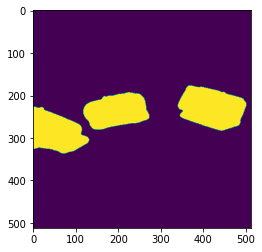

In [4]:
i = 150

d_img = cv2.imread(str(d_imgs[i])) / 255
s_img = cv2.imread(str(s_imgs[i])) / 255

diff = d_img - s_img
diff = np.sum(diff ** 2, axis=-1, keepdims=True)

diff = cv2.GaussianBlur(diff,(15,15),0)

thre = 0.005
diff[diff < thre] = 0.
diff[diff > thre] = 1.
plt.imshow(diff)

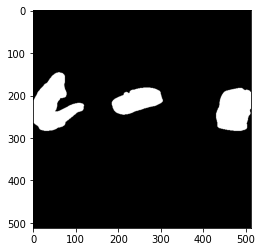

In [5]:
plt.imshow(mask)

In [6]:
diff

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

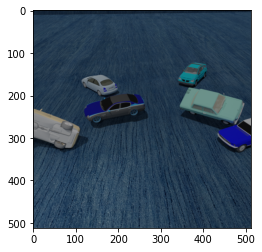

In [7]:
plt.imshow(d_img)


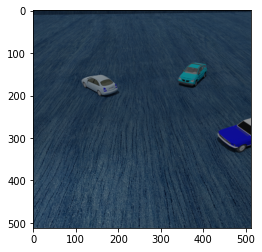

In [8]:
plt.imshow(s_img)